# **Importances and Coefficients**
*   Samar KRIMI
*   07/12/2023

---

# **FOOD SALES PREDICTIONS**

I will revisit my first project to predict supermarket sales. I will explain how my models made their predictions.

# **Project 1 - Part 5**

In [1]:
## Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set text displays & set pandas as the default output for sklearn
from sklearn import set_config
set_config(display='text', transform_output='pandas')

# **EDA**

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load data 'sales_predictions_2023.csv'
filename = '/content/sales_predictions_2023.csv'
# Read data
df = pd.read_csv(filename)
# Obtain essential information about the data : check columns, rows, data types, and missing values
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Check dataframe shape
df.shape

(8523, 12)

### Data Overview

In [8]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [9]:
# Clean extra spaces
df.columns = df.columns.str.strip()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Check for total values for each type
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

*   7 objects, 4 floats, 1 integer



In [11]:
# Check the duplicates : No duplicated
df.duplicated().sum()

0

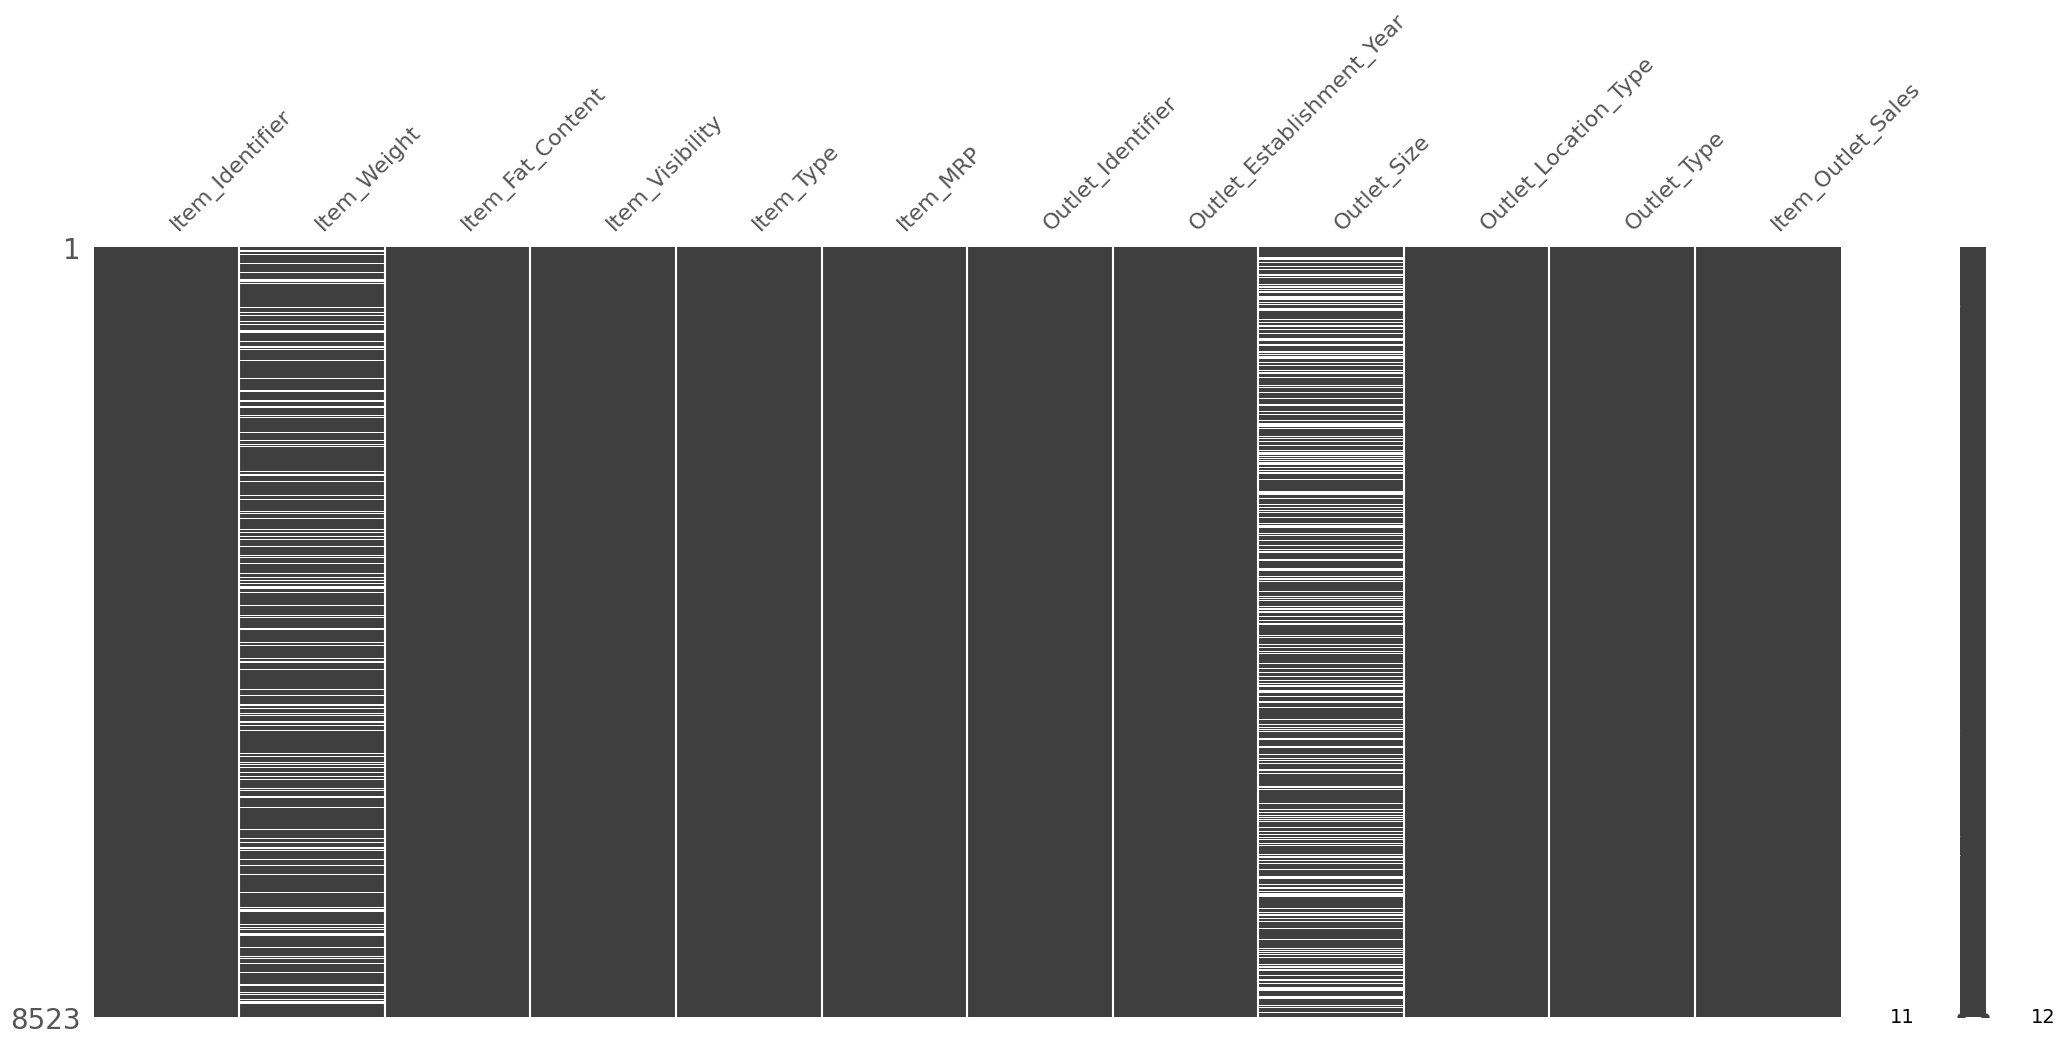

In [12]:
# Missing data visualization
msno.matrix(df);

## Features Inspection

In [13]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

* We will use Exploratory Visualizations to determine the best imputation method for the numerical feature : 'Item_Weight'

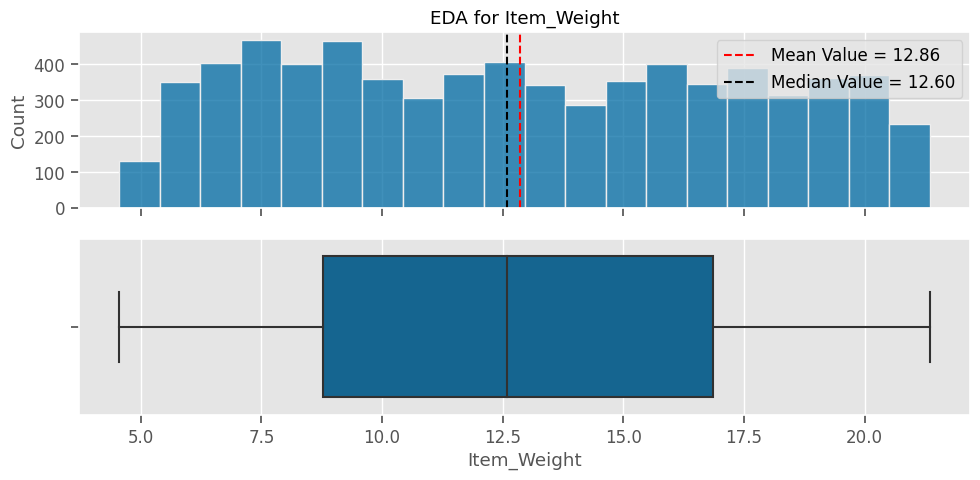

In [14]:
# Plot histogram & boxplot using custom function
plot_numeric(df, 'Item_Weight')

* The distribution is symetric bimodal, Imputation with mean value for 'Item_Weight' feature

In [15]:
# Imputing missing data of 'Item_Weight' feature by its mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df['Item_Weight'].isna().sum()

0

In [16]:
# Check the categorical values of 'Outlet_Size' feature
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* Imputation for categorical 'Outlet_Size' feature by the most occured category = Medium

In [17]:
# Imputing Missing Data of Outlet_Size column by its categorical value equal to Medium
df['Outlet_Size'].fillna(value='Medium', inplace = True)
display(df['Outlet_Size'].value_counts(), df['Outlet_Size'].isna().sum())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

0

## Check the target normal distribution graphically

In [18]:
# Statistical import
from scipy import stats

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


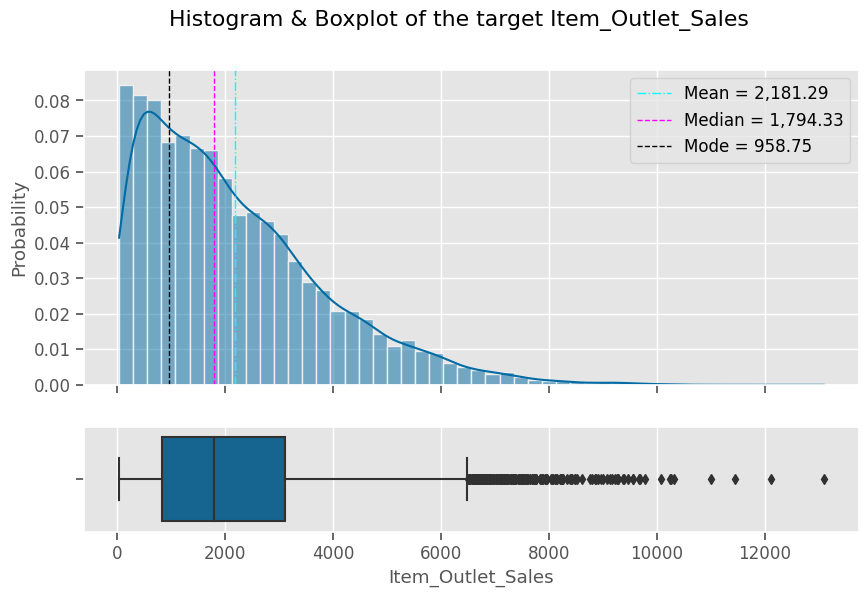

In [19]:
## Visualize Distributions and Means
col = 'Item_Outlet_Sales'
feature = df[col]
mean = feature.mean()
median = feature.median()
mode=stats.mode(feature)
md=mode.mode

## Plot the target histogram with KDE
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,6),
                         gridspec_kw={'height_ratios':[0.75,0.25]})

sns.histplot(data=df, x='Item_Outlet_Sales', stat='probability', kde = True, ax=axes[0], bins=50)

axes[0].axvline(mean, ls='-.', color = 'cyan', linewidth = 1, label=f'Mean = {mean:,.2f}')
axes[0].axvline(median, ls='--', color = 'magenta', linewidth = 1, label = f'Median = {median:,.2f}')
axes[0].axvline(md, ls='--', color = 'black', linewidth = 1, label = f'Mode = {md:,.2f}')
axes[0].legend();

## Plot boxplot showing outliers
sns.boxplot(data=df, x='Item_Outlet_Sales', ax=axes[1]);
fig.suptitle('Histogram & Boxplot of the target Item_Outlet_Sales', fontsize='large');

# Take a look at how the Item_Outlet_Sales are distributed
print(df['Item_Outlet_Sales'].describe())

In [20]:
# Check distribution's skew : Pearson calculation for target
kurt = stats.kurtosis(df['Item_Outlet_Sales'], fisher = False)
print(kurt)
if kurt > 3:
    print(f"Leptokurtic")

4.614224991590342
Leptokurtic


* Graphically Normal distribution is not assumed :
  - it's a numerical feature because the histogram bars have no gaps in between them.
  - Positively skewed distribution because the mode is smaller than median, the median is smaller than the mean also the distribution has long right tail. More of the values are grouped to the left.
  - Some outliers.

In [21]:
# Check for target outliers
outliers = np.abs(stats.zscore(df['Item_Outlet_Sales'])) > 3
outliers.sum()
print(f"There are {outliers.sum()} outliers in the Item_Outlet_Sales out of {len(df['Item_Outlet_Sales'])}")

There are 90 outliers in the Item_Outlet_Sales out of 8523


* **Object Features**

In [22]:
# Get all object datatypes
data_types = df.dtypes
str_cols = data_types[data_types=="object"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

* Check any inconsistencies in categorical Features

In [23]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
# Checking nuniuqe categories
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [25]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [26]:
# Check for cardinality of 'Item_Identifier' column
df['Item_Identifier'].nunique()

1559

In [27]:
# Drop the 'Item_Identifier' column due to high cardinality
df.drop(columns = 'Item_Identifier', inplace = True)

In [28]:
# Checking unique values in 'Outlet_Establishment_Year' => I will convert it as object not integer
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [29]:
# The 'Outlet_Establishment_Year' column is an object => I will consider it nominal
# Convert the datatype of 'Outlet_Establishment_Year' from integer to 'object'
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [30]:
# We use .value_counts() to examine 'Item_Fat_Content' feature
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
# Inconsistent categories of data from 'Item_Fat_Content' feature are fixed
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat','reg'],['Low Fat','Low Fat','Regular'])
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
# Inconsistent categories of data from Item_Fat_Content column are fixed
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat'],['Low'])
df['Item_Fat_Content'].value_counts()

Low        5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* Inconsistent categories of data from Item_Fat_Content are fixed : LF and low fat are replaced by Low Fat and reg is replaced by Regular


In [33]:
# We use .value_counts() to examine 'Item_Type' feature
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* Household and Health and Hygiene are unrelated to 'Item_type' column that
describes the category to which the product belongs there must be replaced by others

In [34]:
#  Inconsistent categories of data from Item_Type feature are fixed
df['Item_Type'] = df['Item_Type'].replace(['Household', 'Health and Hygiene'],['Others','Others'])
df['Item_Type'].value_counts()

Others                   1599
Fruits and Vegetables    1232
Snack Foods              1200
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In final,

There's 6 nominal features :'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'.

There's 1 ordinal feature :  'Outlet_Size'

* **Numeric features**

In [35]:
# Get all float64 datatypes
data_types[data_types=="float64"]

Item_Weight          float64
Item_Visibility      float64
Item_MRP             float64
Item_Outlet_Sales    float64
dtype: object

In [36]:
# Get all int64 datatypes
data_types[data_types=="int64"]

Outlet_Establishment_Year    int64
dtype: object

In [37]:
# Checking nuniuqe values sorted by ascending values
df.select_dtypes('number').nunique().sort_values()

Item_Weight           416
Item_Outlet_Sales    3493
Item_MRP             5938
Item_Visibility      7880
dtype: int64

In [38]:
# Check the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


# **Preprocessing**

In [39]:
## Preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [40]:
## Setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

* Separate your data into the feature matrix (X) and the target vector (y)

In [41]:
# Arrange data into features matrix and target Vector
# Assign the target column to y
y = df['Item_Outlet_Sales'].copy()
# Assign the features to X (In this case we include all columns except the target column)
X = df.drop(columns = 'Item_Outlet_Sales').copy()

In [42]:
## Drop inappropriate columns
drop_cols = ['Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=drop_cols)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store
4,8.93,Low,0.000000,Others,53.8614,High,Tier 3,Supermarket Type1


* Train/test split the data

In [43]:
# Split training and test, set random_state to SEED for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [44]:
# Showing X_train
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.220,Regular,0.064142,Baking Goods,61.2510,Medium,Tier 3,Grocery Store
7604,6.135,Low,0.079294,Soft Drinks,111.2860,Medium,Tier 3,Supermarket Type2
2762,12.150,Low,0.028593,Others,151.0708,Small,Tier 2,Supermarket Type1
6464,5.945,Low,0.093009,Others,127.8652,Small,Tier 2,Supermarket Type1
4707,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,Small,Tier 2,Supermarket Type1


* Create a ColumnTransformer for Preprocessing

In [45]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Create the preprocessing pipeline for numeric data
num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7ce3e6c45300>)

In [46]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [47]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
const_imputer = SimpleImputer(strategy='constant')
## Making the OrdinalEncoder
# Specifying order of categories for our Ordinal Columm
ord_order = ['High','Medium', 'Small']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [ord_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(const_imputer, ord_encoder, scaler_ord)
ord_pipe
## Make a tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['Outlet_Size']


('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['High', 'Medium', 'Small']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [48]:
# PREPROCESSING PIPELINE FOR NOMINAL DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("Nominal Columns:", ohe_cols)
# Create imputer for nominal data
const_imputer = SimpleImputer(strategy='constant')
## Making the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
## Making an ohe_pipe
ohe_pipe = make_pipeline(const_imputer, ohe_encoder)
ohe_pipe
## Make a tuple for ColumnTransformer
ohe_tuple = ('nominal', ohe_pipe, ohe_cols)
ohe_tuple

Nominal Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')


('nominal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))

In [49]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

In [50]:
# Fit the preprocessor on Training Data Only
X_train_processed = preprocessor.fit(X_train)
X_train_processed

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ce3e6c45300>),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['High',
                                                                              'Med...
                                                                              'Small']])),
                                  

In [51]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)
# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)
# View the processed training data
X_train_transformed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.320469,-0.043295,-1.268171,-0.287004,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.575911,0.248066,-0.459996,-0.287004,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-0.159793,-0.726880,0.182616,1.376216,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,-1.620643,0.511794,-0.192206,1.376216,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,1.264565,-0.002094,1.735461,1.376216,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Models Evaluation and Results**

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [52]:
# Modeling & evaluation metrics Import
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
# Create a function to take the true and predicted labels and print RMSE and R2 metrics
def evaluate_model(y_true, y_pred):
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  print(f'RMSE: {rmse:,.3f} \nR2: {r2:.3f}')

### **Linear Regression Model**

In [54]:
# Run a Linear tree model
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)
# Make predictions using the training and testing data
training_pred = linreg_pipe.predict(X_train)
test_pred = linreg_pipe.predict(X_test)
training_pred[:10]

array([-832.47453174, 1397.20605302, 2456.5038526 , 2069.10806125,
       4050.27429924, 2942.8795223 , 2819.64891723, 5056.95401584,
       -206.35283725,  884.47139246])

In [55]:
# Evaluate Linear Regression Model
print('Training Scores for Linear Regressor Model')
evaluate_model(y_train, training_pred)
print('Testing Scores for Linear Regressor Model')
evaluate_model(y_test, test_pred)

Training Scores for Linear Regressor Model
RMSE: 1,116.610 
R2: 0.563
Testing Scores for Linear Regressor Model
RMSE: 1,165.024 
R2: 0.560


> Linear Regression Model Observations :

This model performs poorly on the training set and testing set regarding R2 metric~0.56, this is a case of high biais (underfit). Most likely, this data is not well suited for a Linear Model. Therefore, we will explore using other regression models to see how it performs.

### **Decision Tree Model**

In [56]:
# Run a decision tree model with default parameters (unlimited depth)
# Instatiate decision tree model
decreg = DecisionTreeRegressor(random_state=SEED)
# Combine the preprocessing ColumnTransformer and the decision tree model in a Pipeline
dec_tree_pipe = make_pipeline(preprocessor, decreg)
# Fit the model pipeline on the training data
dec_tree_pipe.fit(X_train, y_train)
# Make predictions for training & testing data
train_pred = dec_tree_pipe.predict(X_train)
test_pred = dec_tree_pipe.predict(X_test)
training_pred[:10]

array([-832.47453174, 1397.20605302, 2456.5038526 , 2069.10806125,
       4050.27429924, 2942.8795223 , 2819.64891723, 5056.95401584,
       -206.35283725,  884.47139246])

In [57]:
# Evaluate Decision Tree Model
print('Training Scores for Decision Tree Model')
evaluate_model(y_train, train_pred)
print('Testing Scores for Decision Tree Model')
evaluate_model(y_test, test_pred)

Training Scores for Decision Tree Model
RMSE: 0.000 
R2: 1.000
Testing Scores for Decision Tree Model
RMSE: 1,609.943 
R2: 0.160


> Decision Tree Model Observations :

This model performs perfect on the training data regarding R2 metric. However, it performs very poorly on the testing data, this is a case of high variance (overfitting). For RMSE metric, our model penalizes more larger errors than Linear model. This model is definitely overfit and will need tuning.

### **Random Forest Model**

In [58]:
# Run a Random Forest model with default parameters
# Instatiate Random Forest model
rfreg = RandomForestRegressor(random_state=SEED)
# Combine the preprocessing ColumnTransformer and the Random Forest model in a Pipeline
rfreg_pipe = make_pipeline(preprocessor, rfreg)
# Fit the model pipeline on the training data
rfreg_pipe.fit(X_train, y_train)
# Make predictions for training & testing data
train_pred = rfreg_pipe.predict(X_train)
test_pred = rfreg_pipe.predict(X_test)
training_pred[:10]

array([-832.47453174, 1397.20605302, 2456.5038526 , 2069.10806125,
       4050.27429924, 2942.8795223 , 2819.64891723, 5056.95401584,
       -206.35283725,  884.47139246])

In [59]:
# Evaluate Decision Tree Model
print('Training Scores for Random Forest Model')
evaluate_model(y_train, train_pred)
print('Testing Scores for Random Forest Model')
evaluate_model(y_test, test_pred)

Training Scores for Random Forest Model
RMSE: 431.671 
R2: 0.935
Testing Scores for Random Forest Model
RMSE: 1,178.503 
R2: 0.550


> Random Forest Model Observations :
This model performs good on the training data regarding R2 metric, However, it performs poorly on the testing data, it performs better than decision tree model but it still overfitting, we try tunning it to get better predictions.



## **Evaluation**

After trying 2 different models on the data set :
* Linear Regression Model is underfitting : this model with high bias is consistently unable to make accurate predictions using any set of features, may be we should increase the complexity of the model to combat bias
* Decision Tree Model is overfitting :  A high variance often means that we can improve our model's performance on the test set, which is most important. To combat overfitting, we should add regularization.
* Random Forest Model : gives the best results in terms of r2 score, but RMSE score increases compared to the two previous models. This model still overfitting, we will add regularization also.


**Tunning Decision Tree Model**

In [60]:
# Looking at options for tuning this model
decreg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 321,
 'splitter': 'best'}

In [61]:
# Get depth & leaf nodes of tree with default model
dec_tree_pipe['decisiontreeregressor'].get_depth(), dec_tree_pipe['decisiontreeregressor'].get_n_leaves()

(42, 6307)

In [62]:
# Create a range of max_depth values
depths = range(1, 35)
# depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())
# Create a dataframe to store train and test scores.
scores = pd.DataFrame(index=depths, columns=['Train Score', 'Test Score'])
# Loop over the values in depths
for depth in depths:
  # Fit a new model with max_depth
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = SEED)
  # Put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, dec_tree)
  # Fit the model
  tree_pipe.fit(X_train, y_train)
  # Create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  # Calculate score
  train_score = r2_score(y_train, train_pred)
  test_score = r2_score(y_test, test_pred)
  # Store the scores in the scores dataframe
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score
# View first 5 rows of score dataframe
scores.head()

,Train Score,Test Score
1,0.235878,0.235114
2,0.434453,0.425721
3,0.52507,0.522549
4,0.585098,0.581303
5,0.605806,0.590751


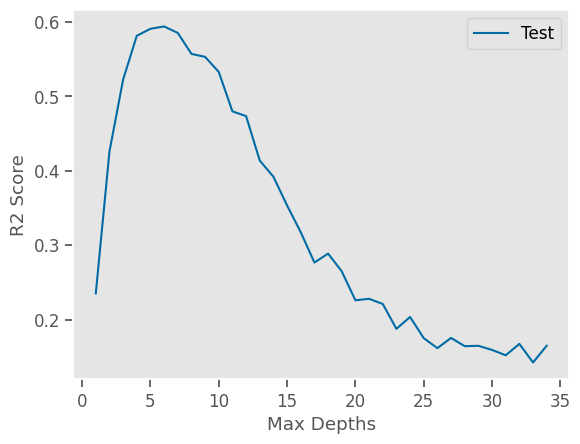

In [63]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores['Test Score'], label = 'Test')
plt.xlabel('Max Depths')
plt.ylabel('R2 Score')
plt.legend()
plt.grid()

In [64]:
# Sort the dataframe by test scores and save the index of the best score
best_depth = scores.sort_values(by='Test Score', ascending=False).index[0]
best_depth

6

In [65]:
# Sort by best result on test data
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Train Score,Test Score
6,0.617774,0.593875
5,0.605806,0.590751
7,0.630515,0.585198
4,0.585098,0.581303
8,0.649503,0.556982


**The best hyperparameter for the tuned Decision Tree Model**

In [66]:
# Let's run the model with our optimized value for max_depth
dec_tree_b = DecisionTreeRegressor(max_depth = best_depth, random_state = SEED)
# Put the model into a pipeline
tree_pipe_b = make_pipeline(preprocessor, dec_tree_b)
# Fit on the training data
tree_pipe_b.fit(X_train, y_train)
# Get predictions
train_pred = tree_pipe_b.predict(X_train)
test_pred = tree_pipe_b.predict(X_test)
# Calculate score
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

In [67]:
# Evaluate Decision Tree Model
print('Training Scores for Decision Tree Model')
evaluate_model(y_train, train_pred)
print('Testing Scores for Decision Tree Model')
evaluate_model(y_test, test_pred)

Training Scores for Decision Tree Model
RMSE: 1,043.914 
R2: 0.618
Testing Scores for Decision Tree Model
RMSE: 1,119.287 
R2: 0.594


* By getting the best hyperparameter (max_depth=6), the R2 testing score become  higher, it grows to 0.594 after tuning. The training (0.618) and test (0.595) results have moved closer to each other & the RMSE score is reduced.
By tunning the decision tree model we have reduced overfitting and RMSE metric on test set. This model still has high bias even after tuning the max depth. We will try other improved regression trees and find a good balance between variance and biais.

**Tunning Random Forest Model**

In [68]:
# Looking at options for tuning this model
rfreg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 321,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Get the depths of each tree in the random forest
best_depths = [estimator.get_depth() for estimator in rfreg.estimators_]
# Get the maximum depth
max(best_depths)

41

* Creating a Loop to Tune n_estimators for Random Forest Regressor Model

In [70]:
%%time
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = SEED, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

CPU times: user 2min 48s, sys: 474 ms, total: 2min 49s
Wall time: 2min 51s


In [71]:
# View first 5 results of score dataframe
scores.head()

,Train,Test
50,0.932156,0.544068
100,0.934642,0.549766
200,0.936677,0.552963
300,0.937167,0.55322
400,0.937512,0.553562


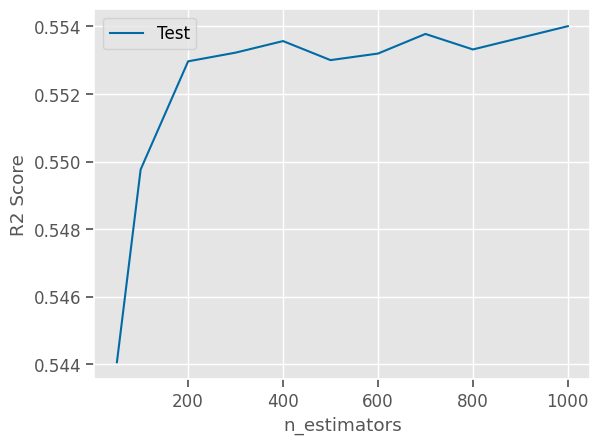

In [72]:
# Visualize which n_estimators leads to the highest r2 score
plt.plot(n_estimators, scores['Test'], label = 'Test')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend();
# plt.grid()

In [73]:
# Sort by best result on test data
sorted_scores = scores.sort_values(by='Test', ascending=False)
sorted_scores.head()

,Train,Test
1000,0.937856,0.554002
700,0.937865,0.553772
400,0.937512,0.553562
800,0.937856,0.553314
300,0.937167,0.55322


In [74]:
# Best n_estimators for Random Forest Model
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

1000

In [75]:
%%time
# Reevaluating Random Forest Regressor Model
best_rf = RandomForestRegressor(random_state = SEED, n_estimators=best_estimators)
best_rf_pipe = make_pipeline(preprocessor, best_rf)
best_rf_pipe.fit(X_train, y_train)

print('Training Scores for Random Forest') # Training Scores for High Variance Decision Tree
evaluate_model(y_train, best_rf_pipe.predict(X_train))
print('\n')
print('Testing Scores for Random Forest')
evaluate_model(y_test, best_rf_pipe.predict(X_test))

Training Scores for Random Forest
RMSE: 420.924 
R2: 0.938


Testing Scores for Random Forest
RMSE: 1,172.946 
R2: 0.554
CPU times: user 35.4 s, sys: 300 ms, total: 35.7 s
Wall time: 35.8 s


* By getting a tunning random forest, the r2 score was slithly improved regarding the baseline random forest, the RMSE has decreased.

# **Project 1 - Revisited : Importances and Coefficients**

## **Preprocessing (with Sklearn v1.1+)**

In [76]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.10.12
sklearn version: 1.2.2


### Remake your X_train and X_test as DataFrames :
- The feature names extracted from the column transformer instead of combining the preprocessor and model into 1 pipeline.
- Dropping Categories with OneHotEncoder to adress Multicollinearity, drop='if_binary'
- Since we are focused on producing insights for the stakeholders, we will set intercept=False

In [77]:
## Create numeric preprocessing pipeline
num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [78]:
## Create categorical preprocessing pipeline
cat_selector = make_column_selector(dtype_include='object')
most_freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='MISSING')
ohe_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
cat_pipe = make_pipeline(most_freq_imputer, ohe_encoder)
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [79]:
## Instantiate the make column transformer with verbose_feature_names_out=False
preprocessor = make_column_transformer( (num_pipe, num_selector),
                                       (cat_pipe, cat_selector),
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ce3e6a4b5e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                              

In [80]:
# Fit the preprocessor and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [81]:
# Make X_train_df and X_test_df as dataFrames with the new feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names,
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=feature_names,
                         index=X_test.index)
display(X_train_df.head(), X_test_df.head())

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.320469,-0.043295,-1.268171,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.575911,0.248066,-0.459996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-0.159793,-0.726880,0.182616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,-1.620643,0.511794,-0.192206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,1.264565,-0.002094,1.735461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,0.570044,-0.093503,-0.120626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,1.182164,-0.421698,-0.204533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,-1.308697,0.090081,-0.412092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4608,0.006809,0.168232,0.098198,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5544,0.158039,1.062226,0.354171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# **Modeling**

In [82]:
def evaluate_regression(model, X_train, y_train, X_test, y_test, for_slides=True):
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train', r2_train, mae_train, rmse_train])
        df_version.append(['Test', r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

    else:
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

# Linear Regression Model

### Fit and evaluate the LinearRegresion model using the remake dataframes X_train and X_test data.

In [83]:
# Fit and evaluate the linear regresion model
lin_reg= LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,827.30,"1,116.57"
Test,0.56,860.71,"1,165.24"


* Based on r2 score there's an underfitting , the MAE & RMSE are relatively high.

### Extract and visualize the coefficients that linear regresion model determined

In [84]:
#def get_coefficients(lin_reg):
    #coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    #coeffs.loc['intercept'] = lin_reg.intercept_
    #return coeffs

In [85]:
# Extract coeffs
coeffs = pd.Series(lin_reg.coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['Intercept'] = lin_reg.intercept_
coeffs.head()

Item_Weight                   5.609348
Item_Visibility             -14.123766
Item_MRP                    965.376007
Item_Fat_Content_Regular     30.987434
Item_Type_Baking Goods      156.674755
Name: Coefficients, dtype: float64

In [86]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)

28


28

In [87]:
## formatting numbers to not use, thousands sep, and 2 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
pd.set_option('display.max_rows', None)

In [88]:
# Sort coeffs in an ascending way
coeffs.sort_values().head()

Outlet_Type_Grocery Store   -1,192.71
Item_Visibility                -14.12
Intercept                        0.00
Item_Weight                      5.61
Item_Fat_Content_Regular        30.99
Name: Coefficients, dtype: float64

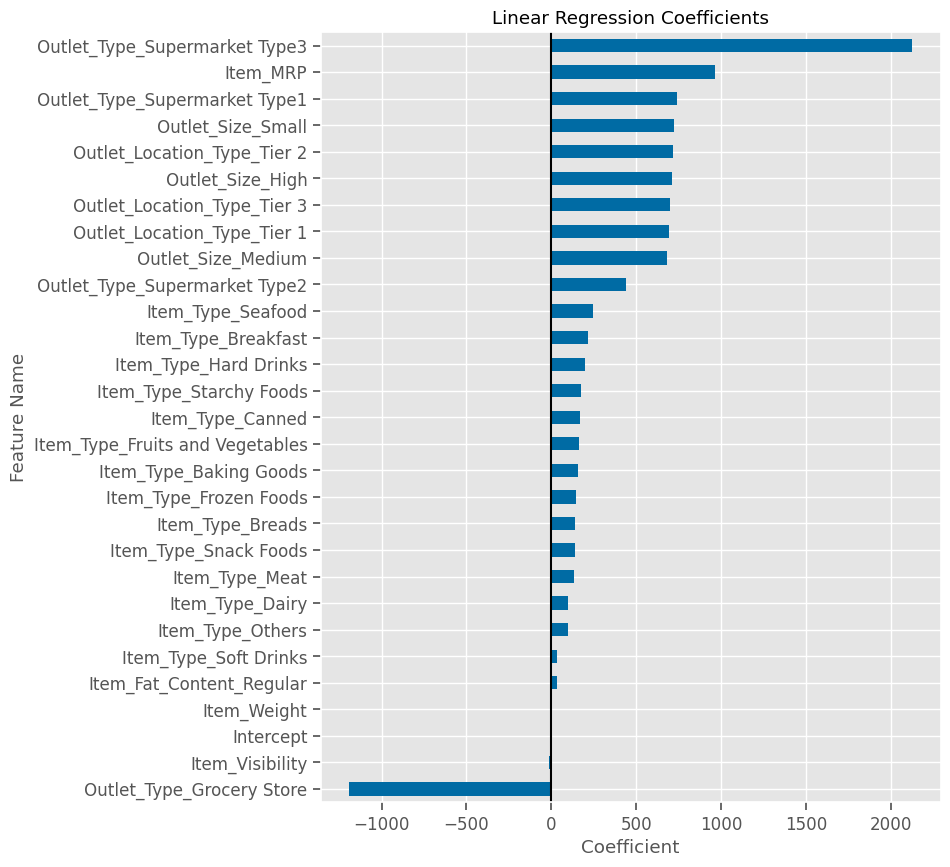

In [89]:
# Plot linear regression coeffs
ax = coeffs.sort_values().plot(kind='barh', figsize=(8,10))
ax.axvline(0, color='k');
ax.set(title='Linear Regression Coefficients', ylabel='Feature Name', xlabel='Coefficient');
#fig = ax.get_figure();
fig.savefig('/content/core_1_coeffs.png', transparent=False, bbox_inches='tight')

In [90]:
# Sort coeffs descending
coeffs.sort_values(ascending=False).head()

Outlet_Type_Supermarket Type3   2,126.68
Item_MRP                          965.38
Outlet_Type_Supermarket Type1     737.72
Outlet_Size_Small                 720.59
Outlet_Location_Type_Tier 2       719.05
Name: Coefficients, dtype: float64

### Select the top 3 most impactful features and interpret their coefficients in plain english.

* Outlet_Location_Type_Tier 1:
      Outlet_Type_Supermarket Type3 increased item outlet sales by 2,126.20
* Item_MRP  
      Item_MRP increased item outlet sales by 965.13
* Outlet_Size_High  
      Outlet_Size_High increased item outlet sales by 737.28

> Save the figure as a .png file inside of my repository (I will need this for the Updated README).

* Testing inserting saved image into markdown: png
/content/core_1_coeffs.png

# Decision Tree Model

In [91]:
# Fit and evaluate the decision tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_df, y_train)
evaluate_regression(tree_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,1.00,0.00,0.00
Test,0.13,"1,159.24","1,640.76"


* Based on r2 score there's an overfitting, the scores are perfect on train data, but r2 score is very poor on test data & the MAE/RMSE are very high.

### Extract and visualize the feature importances that decision tree model determined

In [92]:
## Saving the coefficients
#def get_importances(rf_reg):
    #importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
    #return importances

In [93]:
# Extract importances
importances1 = pd.Series(tree_reg.feature_importances_, index=feature_names,
                        name='Feature Importances')
importances1.head()

Item_Weight                0.05
Item_Visibility            0.11
Item_MRP                   0.46
Item_Fat_Content_Regular   0.01
Item_Type_Baking Goods     0.00
Name: Feature Importances, dtype: float64

In [94]:
importances1.sum()

1.0

  - The importances are all small values (below 1).
  - The importances sum up to 1 overall.

In [95]:
## Checking the number of feature importances matches the # of columns
print(len(tree_reg.feature_importances_))
print(len(X_train_df.columns))
len(tree_reg.feature_importances_) == len(X_train_df.columns)

28
28


True

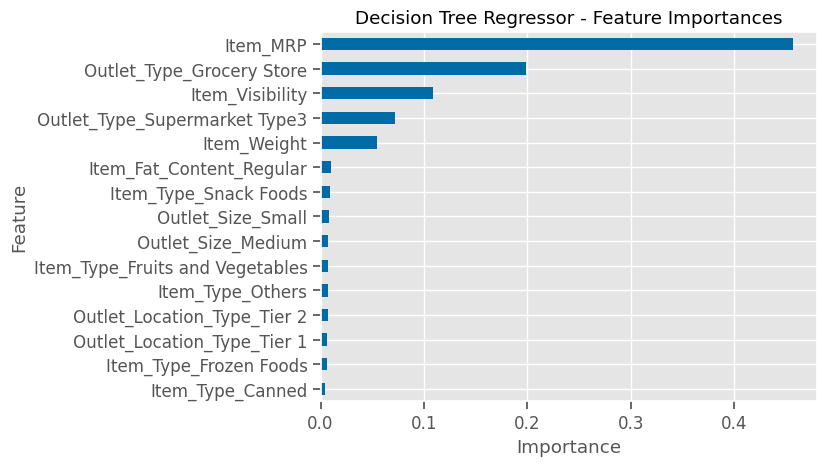

In [96]:
# Plot decision tree importances
ax = importances1.sort_values().tail(15).plot(kind='barh') # figsize=(4,6)
ax.set(title='Decision Tree Regressor - Feature Importances', ylabel='Feature',
      xlabel='Importance');
#fig = ax.get_figure()
fig.savefig('/content/core_1_importances1.png', transparent=False, bbox_inches='tight')

### Identify the top 5 most important features

In [97]:
# Sort importances descending
importances1.sort_values(ascending=False).head()

Item_MRP                        0.46
Outlet_Type_Grocery Store       0.20
Item_Visibility                 0.11
Outlet_Type_Supermarket Type3   0.07
Item_Weight                     0.05
Name: Feature Importances, dtype: float64

- The top 5 most important features :
    - Item_MRP
    - Outlet_Type_Grocery_Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

  Item_MRP is by far the single most important feature for predicting item outlet sales.

  Outlet_Type_Grocery Store is the second most important.

  Item_Visibility, Outlet_Type_Supermarket Type3, Item_Weight, are somewhat important

  Everything else is unimportant.

> Save the figure as a .png file inside of my repository (I will need this for the Updated README).

* Testing inserting saved image into markdown: png
/content/core_1_importances1.png

# Random Forest Model

In [98]:
# # Fit and evaluate the random forest model
rd = RandomForestRegressor(random_state=SEED)
rd.fit(X_train_df, y_train)
evaluate_regression(rd, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.93,296.43,430.61
Test,0.55,824.62,"1,176.34"


* The model is less overfitting than decision tree model, it performs better on test set.

### Extract and visualize the feature importances that random forest model determined

In [99]:
# Extract importances
importances2 = pd.Series(rd.feature_importances_, index=feature_names,
                        name='Feature Importances')
importances2.head()

Item_Weight                0.05
Item_Visibility            0.11
Item_MRP                   0.45
Item_Fat_Content_Regular   0.01
Item_Type_Baking Goods     0.00
Name: Feature Importances, dtype: float64

In [100]:
## Checking the number of feature importances matches the # of columns
print(len(rd.feature_importances_))
print(len(X_train_df.columns))
len(rd.feature_importances_) == len(X_train_df.columns)

28
28


True

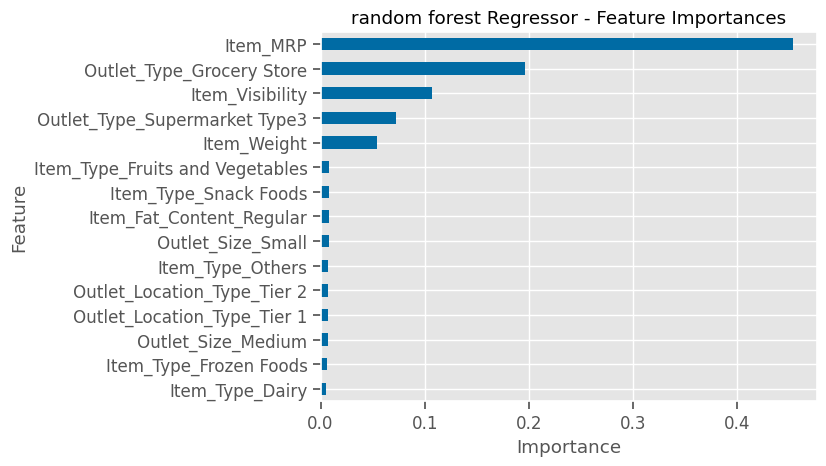

In [101]:
# Plot random forest importances
ax = importances2.sort_values().tail(15).plot(kind='barh') # figsize=(4,6)
ax.set(title='random forest Regressor - Feature Importances', ylabel='Feature',
      xlabel='Importance');
#fig = ax.get_figure()
fig.savefig('/content/core_1_importances2.png', transparent=False, bbox_inches='tight')

### Identify the top 5 most important features

In [102]:
# Sort importances descending
importances2.sort_values(ascending=False).head()

Item_MRP                        0.45
Outlet_Type_Grocery Store       0.20
Item_Visibility                 0.11
Outlet_Type_Supermarket Type3   0.07
Item_Weight                     0.05
Name: Feature Importances, dtype: float64

- The top 5 most important features : are the same features as decision tree model

> Save the figure as a .png file inside of my repository (I will need this for the Updated README).

* Testing inserting saved image into markdown: png
/content/core_1_importances2.png

## Best Models Serialization with Joblib

In [103]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train': X_train_df,
         'y_train': y_train,
         'X_test': X_test_df,
          "y_test": y_test,
         'preprocessor': preprocessor,
          'LinearRegression': lin_reg,
          'DecisionTreeRegressor': dec_tree_b,
         'RandomForestRegressor': rd}
joblib.dump(export, 'Project 1-Revisited.joblib')

['Project 1-Revisited.joblib']

* Model Performance

  - Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some high variance in the model, but by far it outperformed the linear regression model & the decision tree model.


### Loading Objects from a Joblib File

In [104]:
# Load joblib file
import joblib
loaded = joblib.load('Project 1-Revisited.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'])

In [105]:
# Load objects from Joblib File
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model1 = loaded['LinearRegression']
loaded_model2 = loaded['DecisionTreeRegressor']
loaded_model3 = loaded['RandomForestRegressor']

In [106]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [107]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

Split,R^2,MAE,RMSE
Train,0.93,296.43,430.61
Test,0.55,824.62,"1,176.34"


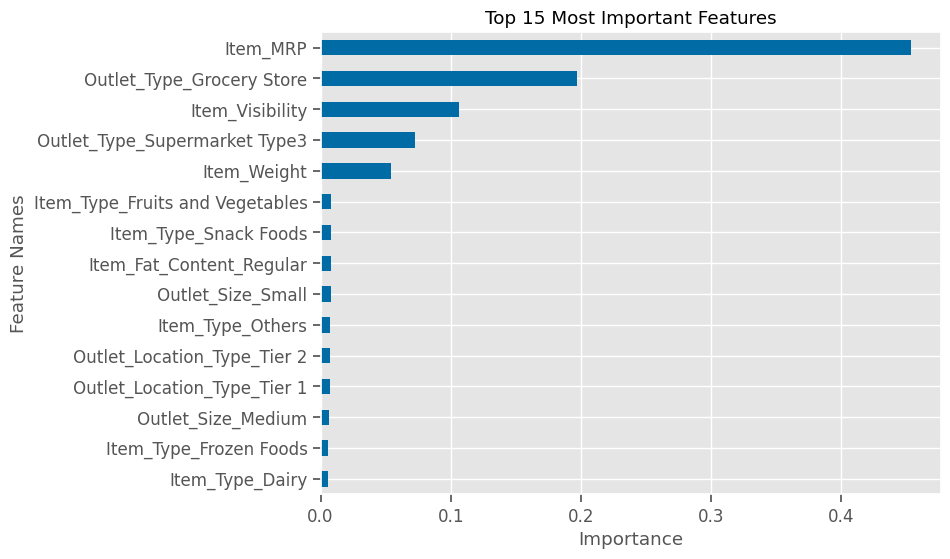

In [108]:
# Check if the variables are all fully intact
evaluate_regression(loaded_model3, X_train_df, y_train, X_test_df, y_test)
loaded_importances = get_importances(loaded_model3)
plot_importance_color(loaded_importances, top_n=15, color_dict=None);